## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df_tmp = pd.read_csv('2_QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)
df = df_tmp[df_tmp.DATE != 'm']

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


In [4]:
df.tail()

,DATE,TAG,POSTS
2505,2023-08-01 00:00:00,php,1940
2506,2023-08-01 00:00:00,python,10861
2507,2023-08-01 00:00:00,r,2407
2508,2023-08-01 00:00:00,ruby,212
2509,2023-08-01 00:00:00,swift,1033


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [5]:
df.shape

(2510, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [6]:
df.count()

DATE     2510
TAG      2510
POSTS    2510
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [7]:
post_per_tag_sum = df.groupby('TAG').sum()
post_per_tag_sum = post_per_tag_sum.sort_values('POSTS', ascending=False)
print(post_per_tag_sum)

                                                         DATE    POSTS
TAG                                                                   
javascript  2008-08-01 00:00:002008-09-01 00:00:002008-10-...  2507957
python      2008-08-01 00:00:002008-09-01 00:00:002008-10-...  2157668
java        2008-08-01 00:00:002008-09-01 00:00:002008-10-...  1904287
c#          2008-07-01 00:00:002008-08-01 00:00:002008-09-...  1600155
php         2008-08-01 00:00:002008-09-01 00:00:002008-10-...  1460681
c++         2008-08-01 00:00:002008-09-01 00:00:002008-10-...   798073
r           2008-09-01 00:00:002008-11-01 00:00:002008-12-...   495981
c           2008-08-01 00:00:002008-09-01 00:00:002008-10-...   398744
swift       2009-01-01 00:00:002009-02-01 00:00:002009-03-...   329545
ruby        2008-08-01 00:00:002008-09-01 00:00:002008-10-...   228327
go          2009-11-01 00:00:002009-12-01 00:00:002010-01-...    70522
perl        2008-08-01 00:00:002008-09-01 00:00:002008-10-...    67804
delphi

In [8]:
post_per_tag_count = df.groupby('TAG').count()
post_per_tag_count = post_per_tag_count.sort_values('POSTS', ascending=False)
print(post_per_tag_count)

            DATE  POSTS
TAG                    
c#           182    182
assembly     181    181
c            181    181
c++          181    181
delphi       181    181
java         181    181
javascript   181    181
perl         181    181
php          181    181
python       181    181
ruby         181    181
r            179    179
swift        173    173
go           166    166


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [9]:
months_col_tmp = df['DATE'].str.split("-", expand=True)
months_col = months_col_tmp[0] + '-' + months_col_tmp[1]
df.insert(1, "YEAR-MONTH", months_col)


In [37]:
year_col = months_col_tmp[0]
df.insert(1, "YEAR", year_col)

In [10]:
languages_per_month = df.groupby('YEAR-MONTH')['TAG'].count()
print(languages_per_month)

YEAR-MONTH
2008-07     1
2008-08    11
2008-09    12
2008-10    11
2008-11    12
           ..
2023-04    14
2023-05    14
2023-06    14
2023-07    14
2023-08    14
Name: TAG, Length: 182, dtype: int64


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [11]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [12]:
type(df['DATE'][1])

str

In [13]:
df.DATE = pd.to_datetime(df['DATE'])
print(df.head())

        DATE YEAR-MONTH       TAG  POSTS
0 2008-07-01    2008-07        c#      3
1 2008-08-01    2008-08  assembly      8
2 2008-08-01    2008-08         c     83
3 2008-08-01    2008-08        c#    505
4 2008-08-01    2008-08       c++    164


## Data Manipulation



In [24]:
reshaped_df = df.pivot(index=['DATE'], columns='TAG', values='POSTS')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [15]:
reshaped_df.shape

(182, 14)

In [16]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [17]:
print(reshaped_df.head())

TAG         assembly      c      c#    c++  delphi  go    java  javascript  \
DATE                                                                         
2008-07-01       NaN    NaN     3.0    NaN     NaN NaN     NaN         NaN   
2008-08-01       8.0   83.0   505.0  164.0    14.0 NaN   222.0       163.0   
2008-09-01      28.0  320.0  1641.0  754.0   104.0 NaN  1129.0       634.0   
2008-10-01      16.0  302.0  1988.0  807.0   112.0 NaN  1149.0       722.0   
2008-11-01      16.0  258.0  1731.0  734.0   141.0 NaN   955.0       580.0   

TAG          perl    php  python    r   ruby  swift  
DATE                                                 
2008-07-01    NaN    NaN     NaN  NaN    NaN    NaN  
2008-08-01   28.0  158.0   120.0  NaN   70.0    NaN  
2008-09-01  130.0  475.0   537.0  6.0  286.0    NaN  
2008-10-01  128.0  610.0   506.0  NaN  247.0    NaN  
2008-11-01   97.0  499.0   449.0  1.0  157.0    NaN  


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [35]:
reshaped_df.count().sort_values(ascending=False)

TAG
assembly      182
c             182
c#            182
c++           182
delphi        182
go            182
java          182
javascript    182
perl          182
php           182
python        182
r             182
ruby          182
swift         182
dtype: int64

In [34]:
reshaped_df.fillna(0, inplace=True) 

In [33]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

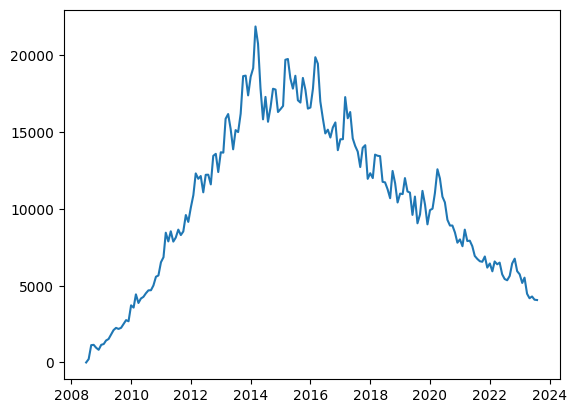

In [44]:
plt.plot(reshaped_df.index, reshaped_df.java)

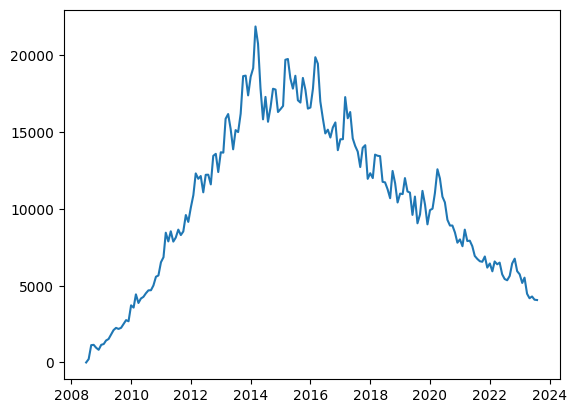

In [45]:
plt.plot(reshaped_df.index, reshaped_df['java'])

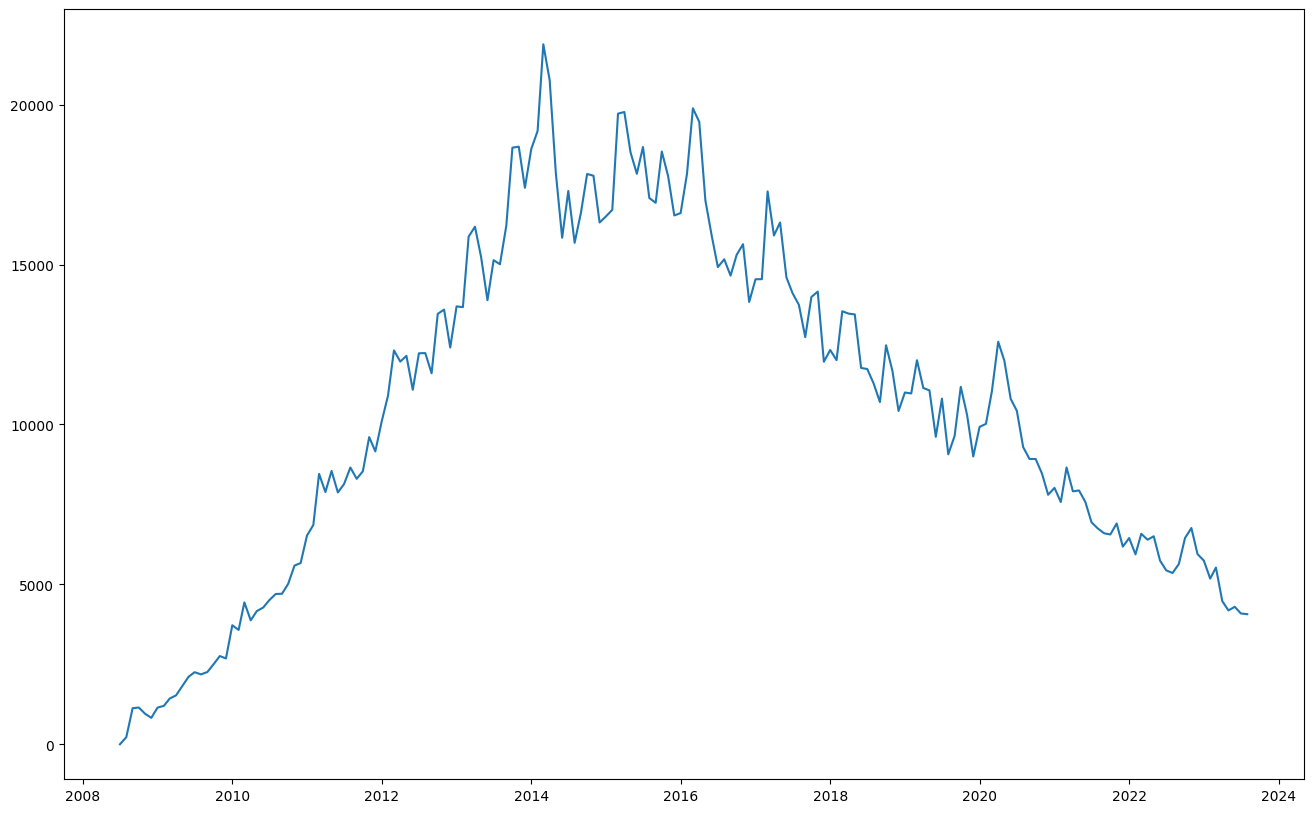

In [46]:
plt.figure(figsize=(16,10)) 
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

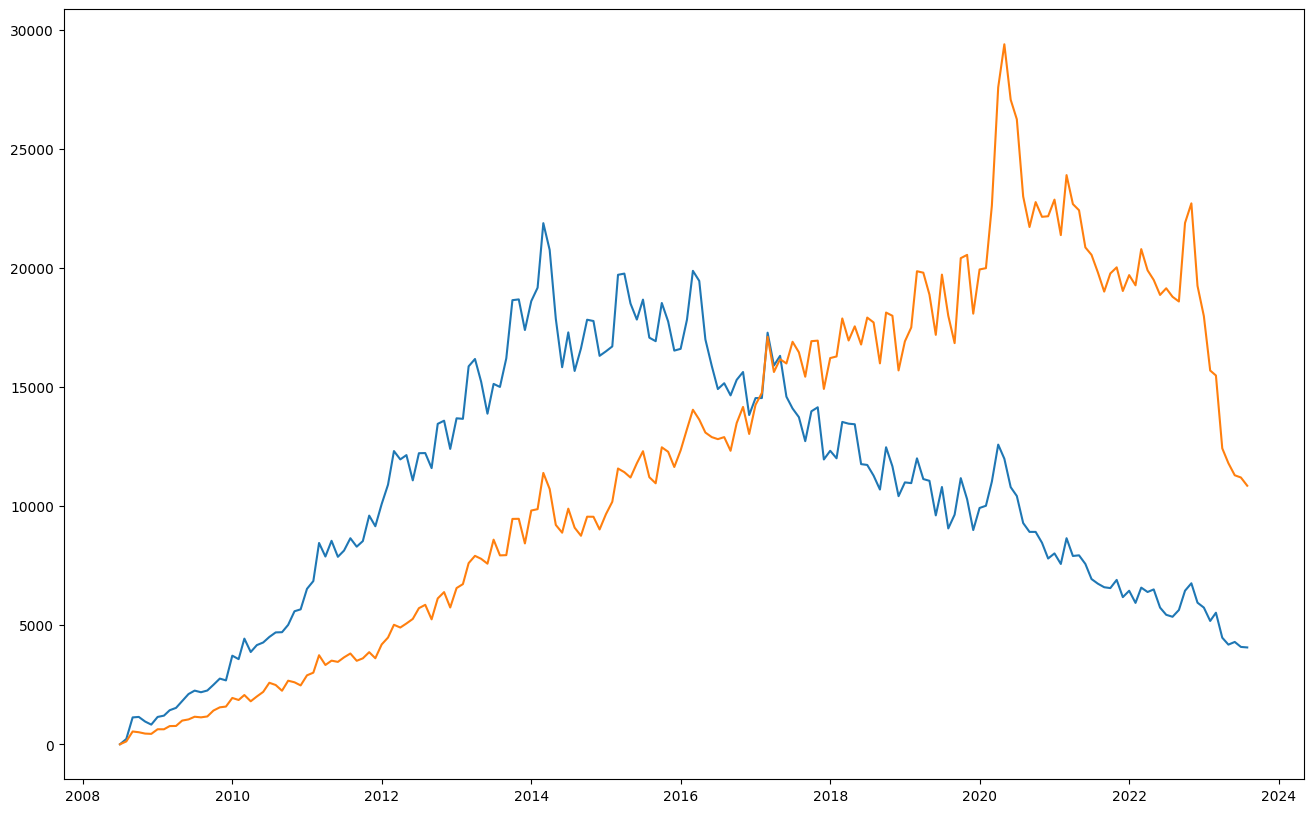

In [50]:
plt.figure(figsize=(16,10)) 
plt.plot(reshaped_df.index, reshaped_df['java'])
plt.plot(reshaped_df.index, reshaped_df['python'])

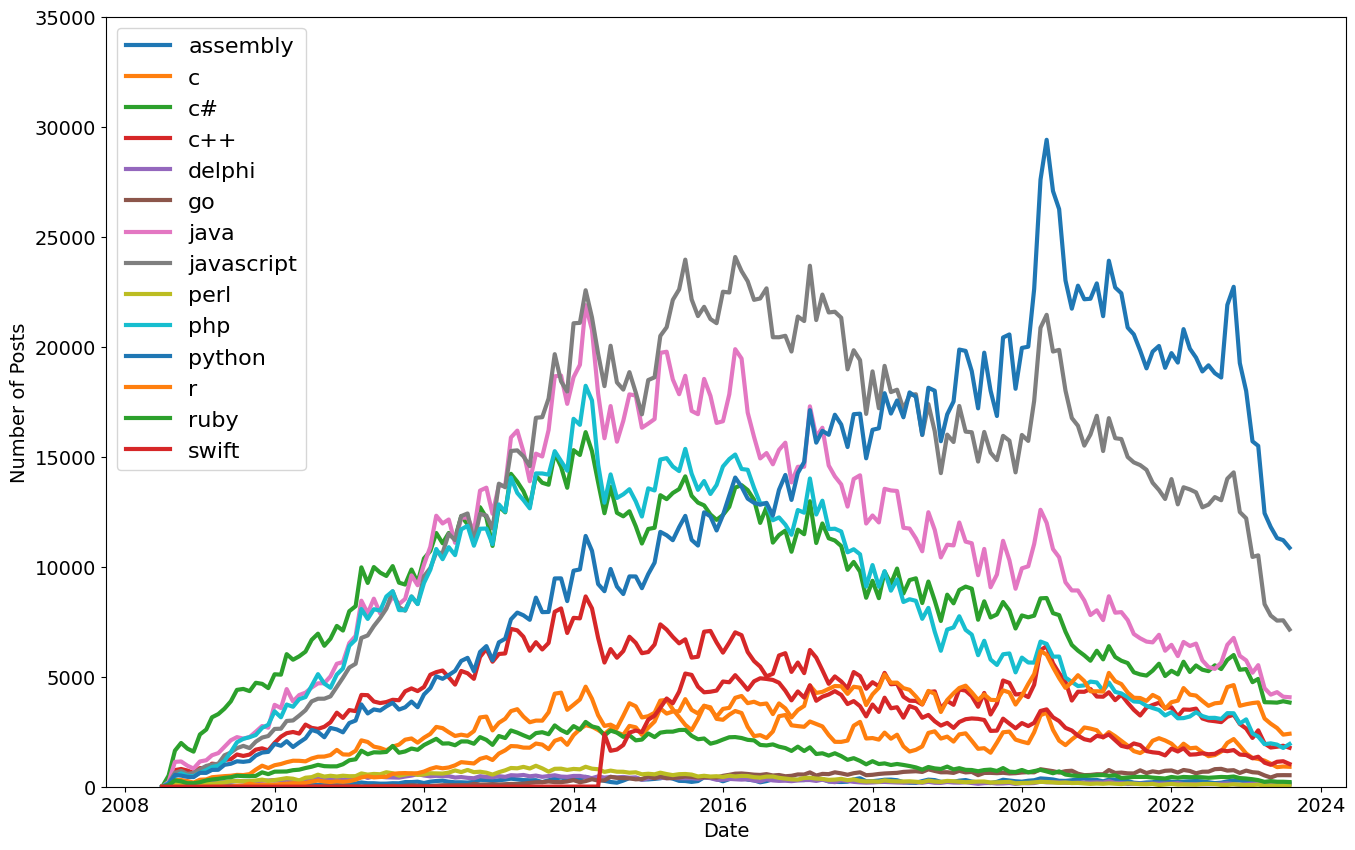

In [55]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name)
 
plt.legend(fontsize=16) 

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

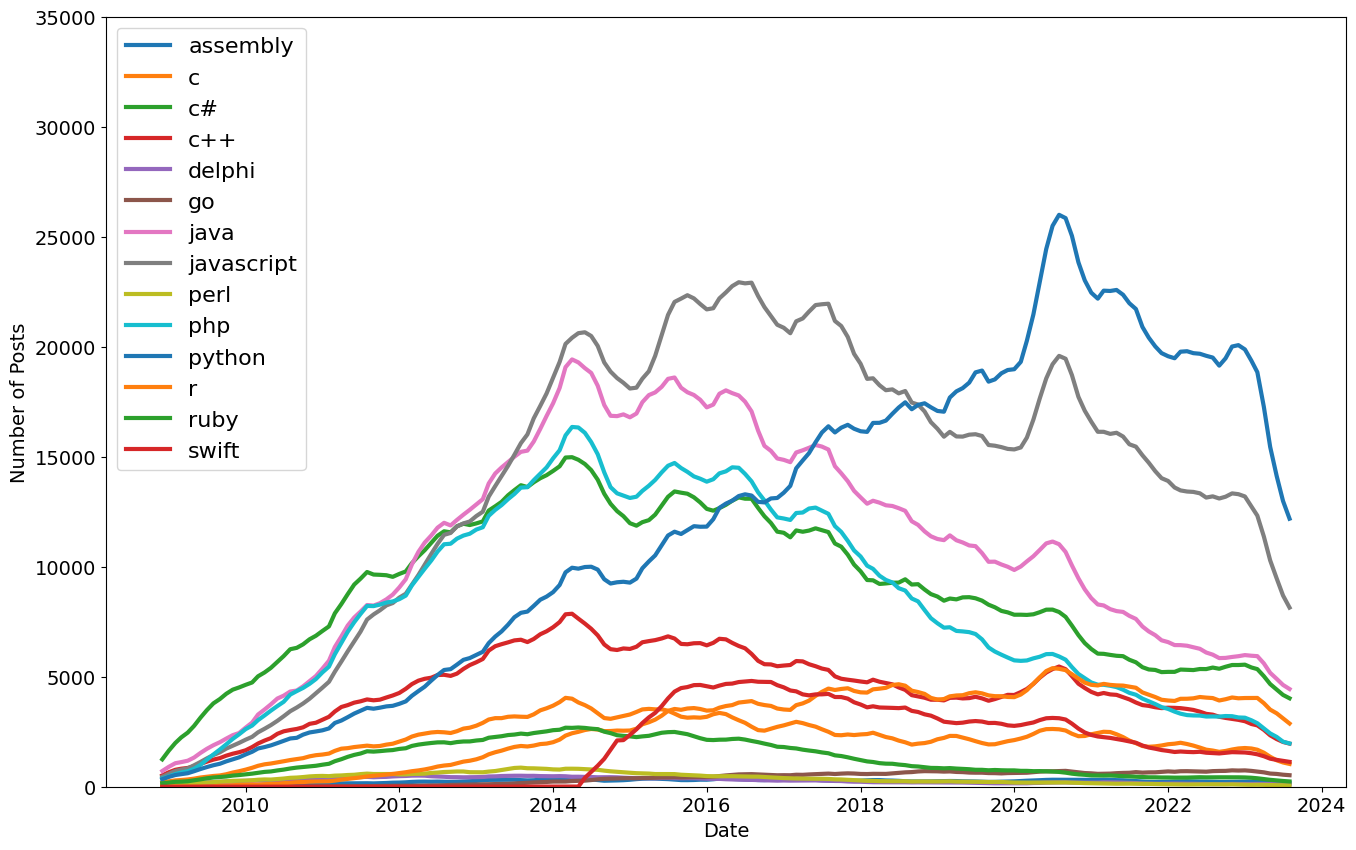

In [56]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

In [ ]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)